# [Keras - Time-Series Anomaly Detection](https://keras.io/examples/timeseries/timeseries_anomaly_detection/)

In [46]:
# Hiding tensorflow warnings. 
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Numerical arrays.
import numpy as np

# Spreadsheet like dataframes.
import pandas as pd

# Neural networks.
from tensorflow import keras

# layers pf neural networks.
from tensorflow.keras import layers

# Plotting
from matplotlib import pyplot as plt


In [40]:
# Setting plot style.
plt.style.use('bmh')

***

## Introduction

Introduce this notebook, set context for what the reader can expect.

***

## TensorFlow & Keras

### TensorFlow

Tensorflow is a machine learning libary that is used in a variety of programming languages, although Python is the most common language that it is used on. It was created by Google Brain - Google's Machine Intelligence Research organisation in 2012[1]. It was made available for the public in 2015 [2]. Tensorflow uses various tools and libraries to perform various tasks focused on training neural networks [3].

<br>

### What is a neural network?
A neural network or artifical neural network is a form of machine learning. The name and structure was influence by the human brain.  Their structure consist of nodes, and signals. The network contains an input layer of nodes, an output layer, and many hidden layers inbetween. Each node has a weight and treshold.  If the nodes output is above the treshold, the node will send data to the following layer in the network.  Initially training data is read into the neural network. These neural networks become more accurate over time [4]. 

<br>

![neuralnetwork](https://ml-cheatsheet.readthedocs.io/en/latest/_images/neural_network_w_matrices.png)


<br>

### Keras
Keras is a Python library that is embedded into TensorFlow. The Keras library in TensorFlow is used to make the working with neural networks easy as there is a great deal of abtraction. A neural network can be trained in a few lines of code [5]. As eluded to above, the layers are the building blocks of a neural network. The Keras package contains a library of "layers" to be used when building a model.  The mathamatical formulas for these methods are abstracted from the user [6]. More will be discussed on layers later. 




***

<br>

## Time-Series Anomaly Detection.

Anomalies in time-series data are outlier data points which do not conform with the patterns in a sequence of data points collected over an interval of time [7].  Anomaly detection will help segregate outliers.   Below is an example plot showing an outlier in what would otherwise be a linear value-time dataset. 

In [44]:
# x and y values for a line. 
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
y = [0,1,2,3,4,5,5,7,8,9,10,11,12,13,14,15,16,17,18]

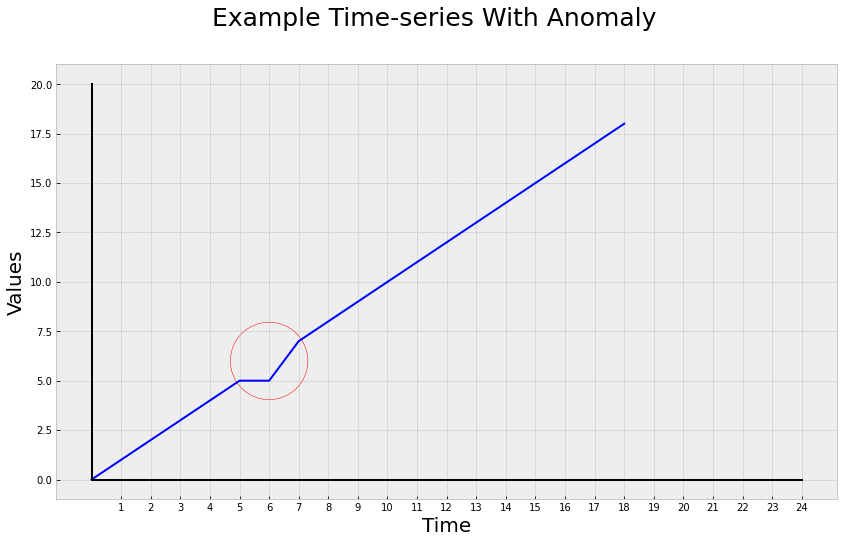

In [45]:
# fig with size 14,8.
fig, ax = plt.subplots(figsize =(14,8))

# plot x and y values
ax.plot(x,y, c='b')

# plot anomaly marker. 
ax.scatter(6,6, marker = 'o', s = 6000, facecolors='none', edgecolors='r')

# Plot better axis. 
ax.plot([0, 24], [0, 0], 'k-')
ax.plot([0, 0], [0, 20], 'k-')

# Plot tick labels.
labels = np.arange (1,25)
ax.set_xticks(labels)
ax.set_xticklabels(labels)

# Setting title and labels. 
fig.suptitle('Example Time-series With Anomaly', fontsize=25)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Values',fontsize=20);

***

## Keras Time-Series Anomaly Detection.

Keras demonstrates a time-series anomaly detection use case on for their neural network autoencoder on their [webiste](https://keras.io/examples/timeseries/timeseries_anomaly_detection/). They demonstration uses the a NAB dataset. 

With anomaly, discuss

without anomaly.  dicuss

NAB is a benchmark for evaluating algorithms for anomaly detection....


https://www.kaggle.com/datasets/boltzmannbrain/nab

https://github.com/numenta/NAB

<br>

In [4]:
# Root url of data. 
root_url = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

# Data file without anomaly.
no_anomaly_url = root_url + "artificialNoAnomaly/art_daily_small_noise.csv"

# Data file with anomaly.
with_anomaly_url = root_url + "artificialWithAnomaly/art_daily_jumpsup.csv"

<br>

### Reading in file without anomaly.

In [5]:
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

<br>

#### Previewing data without anomaly. 

In [6]:
# Printing the first 5 values.
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


<br>

#### Plotting data with anomaly.

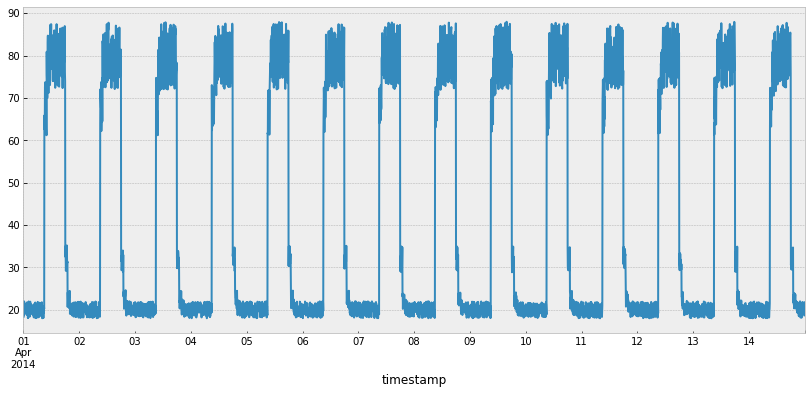

In [7]:
# Plotting as subplot, setting fig size to 14,6.
fig, ax = plt.subplots(figsize =(14,6))

# Plotting dataframe on single axis.  Legend = false as its not useful.
df_small_noise.plot(legend=False, ax=ax);

<br>

### Reading in file with anomaly.

In [8]:
# Reading in file with anomaly.
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

<br>

#### Previewing data with anomaly.

In [9]:
# Previewing file with anomaly. 
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


<br>

#### Plotting data with anomaly.

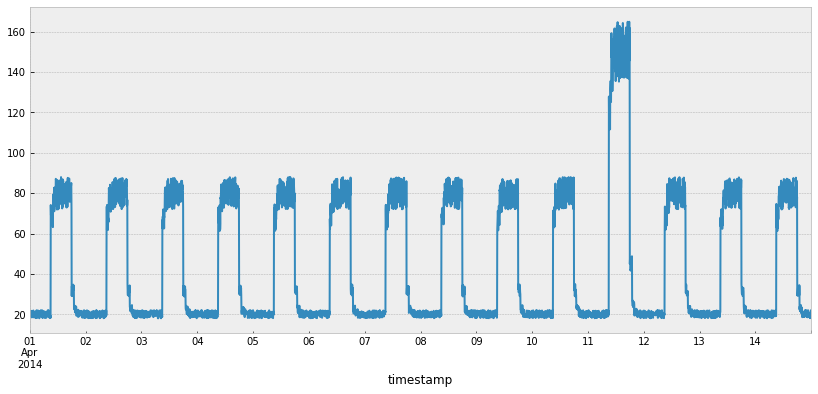

In [10]:
# Plotting as subplot, setting fig size to 14,6.
fig, ax = plt.subplots(figsize =(14,6))

# Plotting dataframe on single axis.  Legend = false as its not useful.
df_daily_jumpsup.plot(legend=False, ax=ax);

<br>

### Pre-processing

<br>

#### Normalising the test data.
<br>

In [11]:
train_mean =  df_small_noise.mean()
train_std = df_small_noise.std()

In [12]:
df_train_vals = (df_small_noise - train_mean) / train_std

df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


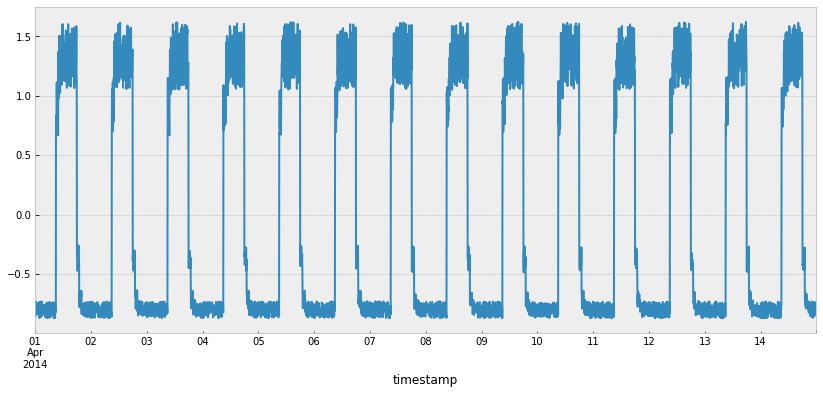

In [13]:
# Plotting as subplot, setting fig size to 14,6.
fig, ax = plt.subplots(figsize =(14,6))

# Plotting dataframe on single axis.  Legend = false as its not useful.
df_train_vals.plot(legend=False, ax=ax);

In [14]:
print("Number of training samples:", df_train_vals.shape[0])

Number of training samples: 4032


In [15]:
windows_size = 288

<br>

Below is a function creates training sequences for use in the model. These are made using sliding windows through the data set. As seen above the data set consists of 4032 values. The size of each window is 288. The final window will consist of the last 288 values in the sample.  As it cannot iterate further to the right, the number of windows created will be (4032 - 288) +1.  +1 because the first window of 288 values inhibates the full interation through these values. 

We also see that the output of the function is a stacked array. This converts the list of lists into a two dimential array of the same shape. https://sparkbyexamples.com/numpy/how-to-use-numpy-stack-in-python/

In [16]:
def windows(values, N=windows_size):
    
    # start with an empty list
    output = []
    
    # Loop through all the possible windows.
    for i in range(len(values) - N + 1):
        
        # Append each window to the list. 
        output.append(values[i : (i + N)])
    
    # Return the list as stacked arrays.
    return np.stack(output)

In [17]:
x_train = windows(df_train_vals.values)

In [18]:
print (f"As the function iterates through the full data set of {df_train_vals.shape[0]} values, it creates {x_train.shape[0]} possible windows each containing {x_train.shape[1]} values.")

As the function iterates through the full data set of 4032 values, it creates 3745 possible windows each containing 288 values.


<br>

Below I will visualise the first window (288 values) along side the first 1200 values which is approx 4 windows. 

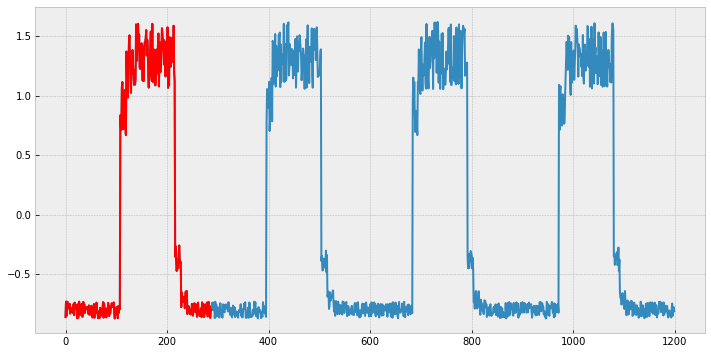

In [19]:
# Creating a plot axes size 12,6. 
fig, ax = plt.subplots(figsize =(12,6))

# Getting the first 1200 values i.e. this will be approx 4 windows. 
y = df_train_vals['value'].values[:1200]

# Plotting the first 1200 values.
ax.plot(np.arange(y.shape[0]), y, label = 'signal')

# Getting the first window in a single array.  
w = x_train[0].flatten()

# Plotting the first window in red. 
ax.plot(np.arange(w.shape[0]),w, color='r', label = 'window 1');

<br>

### Neural Network

<br>

Sequential - discuss this function

In [20]:
# Search each method and comment on what it does. 
layers = [
    keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
    keras.layers.Conv1D(filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Conv1D(filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
    keras.layers.Conv1DTranspose(filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Conv1DTranspose(filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
    keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same")
]

In [21]:
# building the model. 
model = keras.Sequential(layers)
# optimizer - comment on what this is. 
optimizer=keras.optimizers.Adam(learning_rate=0.001)
# comment on compile and mse. 
model.compile(optimizer=optimizer, loss="mse")
# comment
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

In [22]:
# sequential - model fit method - history - comment on this and parameters.
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit
history = model.fit(
    x_train, # x_train was no anomaly. Used as input and output
    x_train, # He is saying that when he give this as the input, he expects it to be the output. 
    epochs=50, 
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)


Epoch 1/50
27/27 [==============================] - 2s 36ms/step - loss: 0.4188 - val_loss: 0.0852
Epoch 2/50
27/27 [==============================] - 1s 25ms/step - loss: 0.0782 - val_loss: 0.0417
Epoch 3/50
27/27 [==============================] - 1s 25ms/step - loss: 0.0582 - val_loss: 0.0367
Epoch 4/50
27/27 [==============================] - 1s 26ms/step - loss: 0.0496 - val_loss: 0.0319
Epoch 5/50
27/27 [==============================] - 1s 27ms/step - loss: 0.0434 - val_loss: 0.0299
Epoch 6/50
27/27 [==============================] - 1s 24ms/step - loss: 0.0389 - val_loss: 0.0274
Epoch 7/50
27/27 [==============================] - 1s 25ms/step - loss: 0.0353 - val_loss: 0.0258
Epoch 8/50
27/27 [==============================] - 1s 23ms/step - loss: 0.0321 - val_loss: 0.0246
Epoch 9/50
27/27 [==============================] - 1s 24ms/step - loss: 0.0295 - val_loss: 0.0234
Epoch 10/50
27/27 [==============================] - 1s 25ms/step - loss: 0.0273 - val_loss: 0.0238
Epoch 11/

<br>

### Evaluation

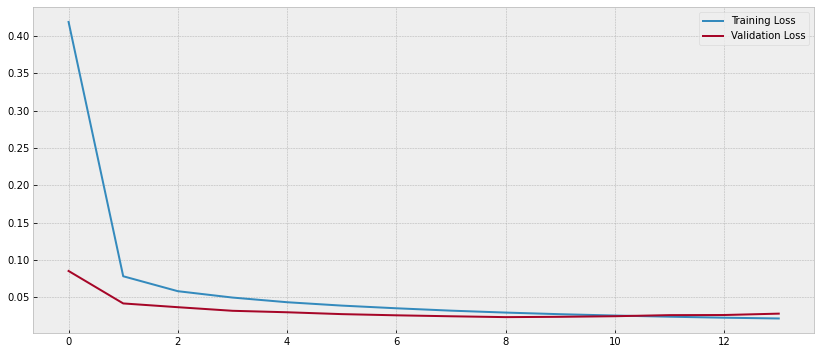

In [23]:
#
fig, ax = plt.subplots(figsize = (14,6))
#
ax.plot(history.history["loss"], label="Training Loss") # history kept because of callback above. History of how the training procedure went.  # look up loss and val_loss in keras. 
                                                                    #I think Epoch will stop early if loss stops goingw
#
ax.plot(history.history["val_loss"], label="Validation Loss")
#
ax.legend();

<br>

MAE loss what does this mean. 

In [24]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)

118/118 [==============================] - 0s 3ms/step


In [25]:
# Calculate the loss... 
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

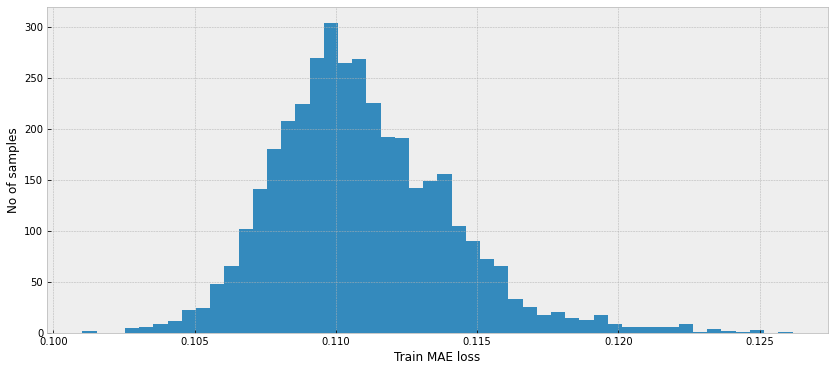

In [26]:
#
fig, ax = plt.subplots(figsize=(14,6))
#
ax.hist(train_mae_loss, bins=50)
#
ax.set_xlabel("Train MAE loss")
#
ax.set_ylabel("No of samples");

In [27]:
# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

Reconstruction error threshold:  0.1261648192664999


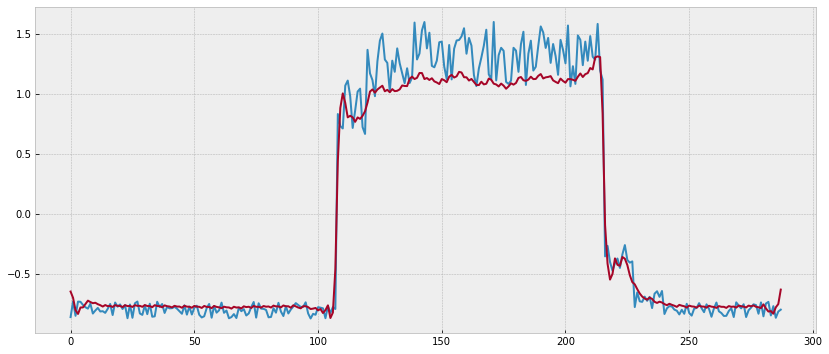

In [28]:
# Checking how the first sequence is learnt
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(x_train[0])
ax.plot(x_train_pred[0]);

In [29]:
#
df_test_value = (df_daily_jumpsup - train_mean) / train_std

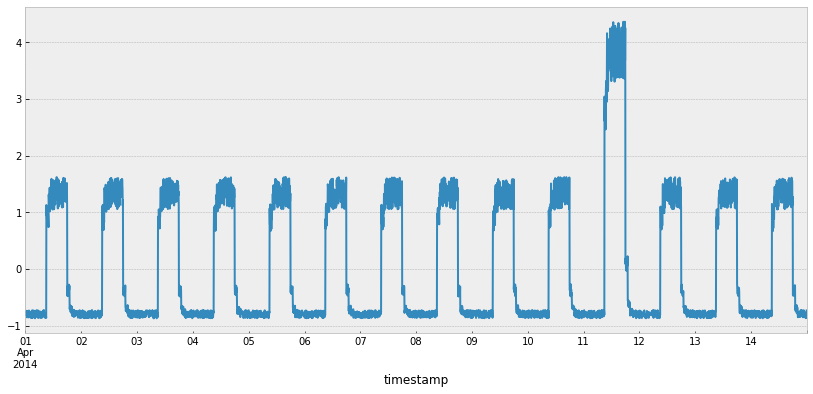

In [30]:
#
fig, ax = plt.subplots(figsize=(14,6))
#
df_test_value.plot(legend=False, ax=ax);

In [31]:
# Create sequences from test values.
x_test = windows(df_test_value.values)

#
print("Test input shape: ", x_test.shape)

Test input shape:  (3745, 288, 1)


In [32]:
# Get test MAE loss. - looked up previously
x_test_pred = model.predict(x_test)

118/118 [==============================] - 0s 3ms/step


In [33]:
#
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

In [34]:
# Reshaped
test_mae_loss = test_mae_loss.reshape((-1))

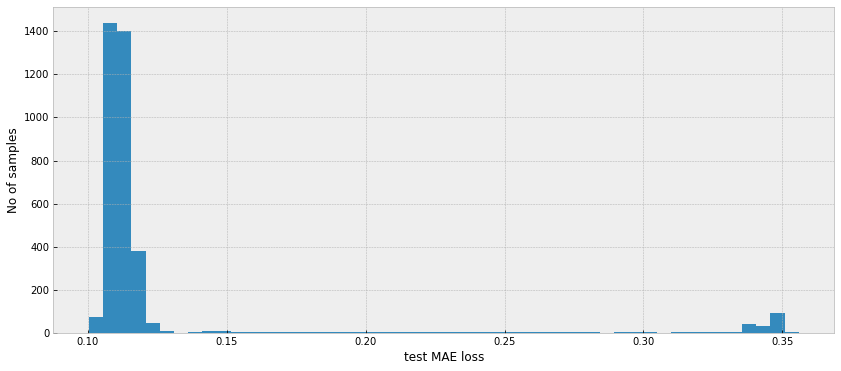

In [35]:
#
fig, ax = plt.subplots(figsize=(14,6))
#
ax.hist(test_mae_loss, bins=50)
#
ax.set_xlabel("test MAE loss")
#
ax.set_ylabel("No of samples"); 

In [36]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold

# Print number of anomalies 
np.sum(anomalies)

398

In [37]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
inds = []

for i in range(windows_size - 1, len(df_test_value) - windows_size + 1):
    if np.all(anomalies[i - windows_size + 1 : i]):
        inds.append(i)

In [38]:
# 
df_subset = df_daily_jumpsup.iloc[inds]

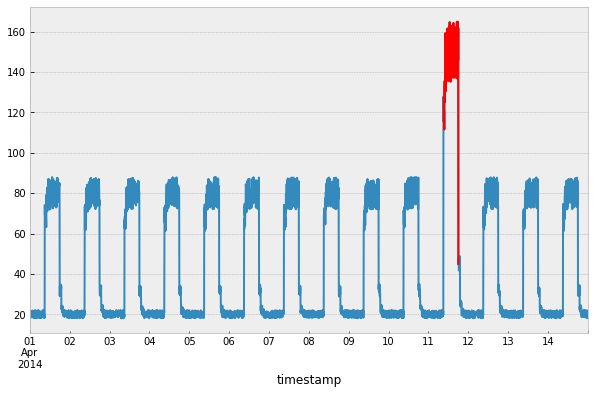

In [39]:
#
fig, ax = plt.subplots(figsize=(10,6))

#
df_daily_jumpsup.plot(legend=False, ax=ax)

#
df_subset.plot(legend=False, ax=ax, color="r"); 

## Conclusion

Suggest improvements I could make to the analysis in this workbook.

***

## References


1. https://github.com/tensorflow/tensorflow
2. https://www.infoworld.com/article/3278008/what-is-tensorflow-the-machine-learning-library-explained.html
3. https://www.guru99.com/what-is-tensorflow.html#1
4. https://www.ibm.com/topics/neural-networks
5. https://www.simplilearn.com/tutorials/deep-learning-tutorial/what-is-keras
6. https://keras.io/api/layers/
7. https://towardsdatascience.com/effective-approaches-for-time-series-anomaly-detection-9485b40077f1




## End
***